<a href="https://colab.research.google.com/github/raviiraj13/Attendance-/blob/main/car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
df = pd.read_csv('car data.csv')

In [358]:
df.shape

(301, 9)

In [359]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [361]:
df.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [362]:
df.duplicated().sum()

np.int64(2)

In [363]:
df.drop_duplicates(inplace=True)

In [364]:
df.shape

(299, 9)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [366]:
df=df.drop('Car_Name',axis=1)

In [367]:
df['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,193
Individual,106


In [368]:
from datetime import datetime
current_year = datetime.now().year
df['Car_Age'] = current_year-df['Year']

In [369]:
df=df.drop('Year',axis=1)


In [370]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,12
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,13
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,9
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,15
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,12
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,10
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,11
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,17
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,9


<Axes: xlabel='Car_Age', ylabel='Density'>

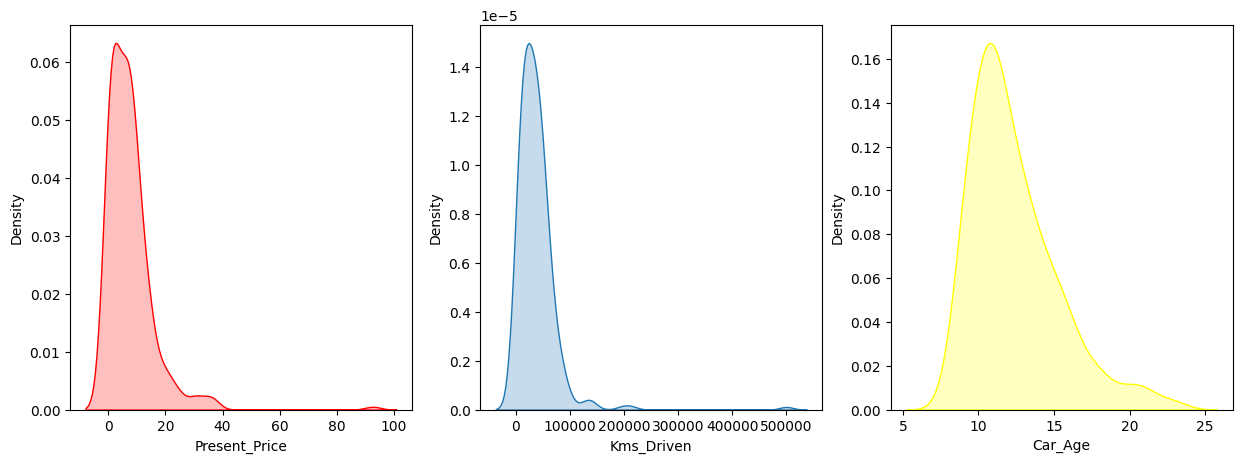

In [371]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(data=df,x='Present_Price',ax=ax[0],fill=True,color='Red')
sns.kdeplot(data=df,x='Kms_Driven',ax=ax[1],fill=True)
sns.kdeplot(data=df,x='Car_Age',ax=ax[2],fill=True,color='yellow')

<Axes: xlabel='Car_Age'>

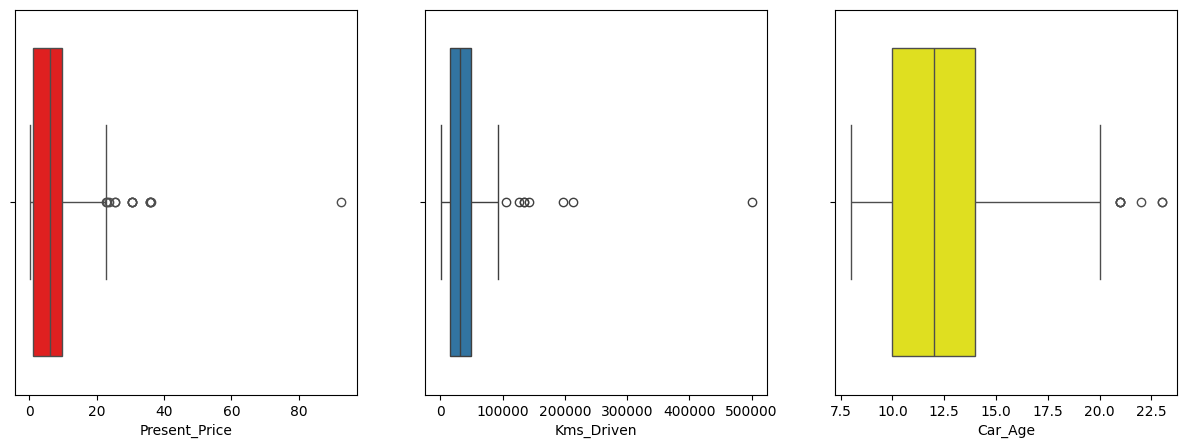

In [372]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=df,x='Present_Price',ax=ax[0],fill=True,color='Red')
sns.boxplot(data=df,x='Kms_Driven',ax=ax[1],fill=True)
sns.boxplot(data=df,x='Car_Age',ax=ax[2],fill=True,color='yellow')

In [373]:
col=['Car_Age']
col[0]

'Car_Age'

In [374]:
for i in col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  # Keep only rows within the bounds
  df = df[~((df[col] < lower) | (df[col] > upper)).any(axis=1)]


<Axes: xlabel='Car_Age'>

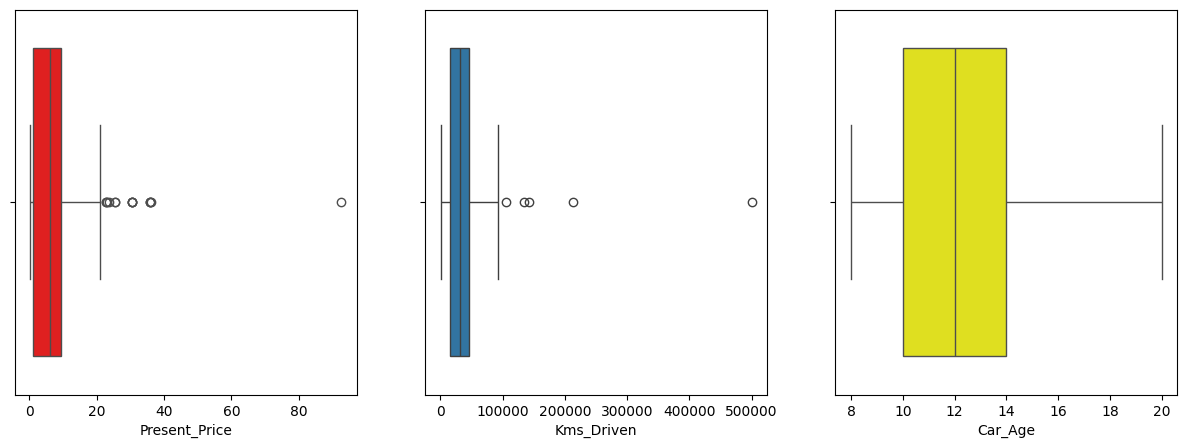

In [375]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=df,x='Present_Price',ax=ax[0],fill=True,color='Red')
sns.boxplot(data=df,x='Kms_Driven',ax=ax[1],fill=True)
sns.boxplot(data=df,x='Car_Age',ax=ax[2],fill=True,color='yellow')

<Axes: xlabel='Car_Age', ylabel='Density'>

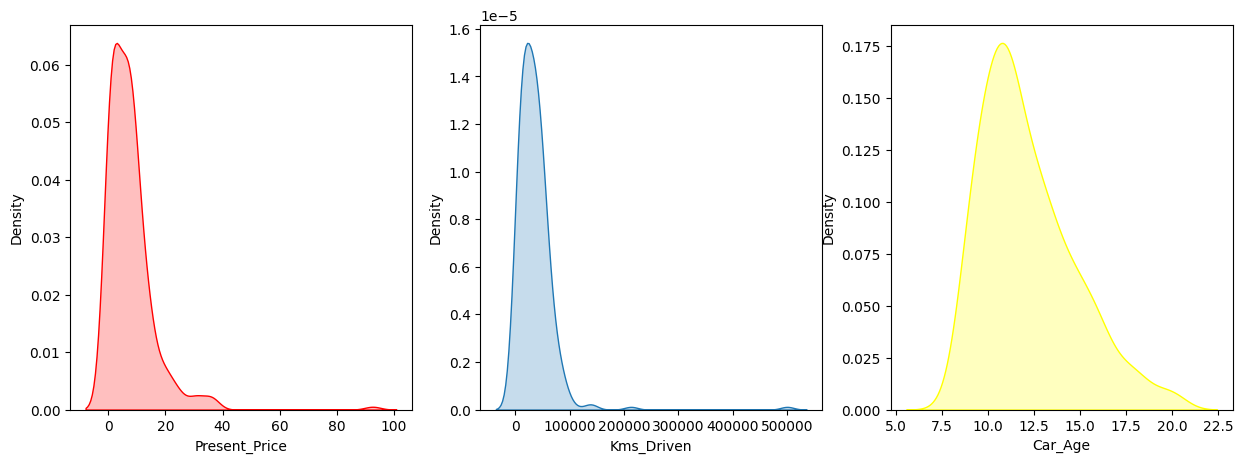

In [376]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(data=df,x='Present_Price',ax=ax[0],fill=True,color='Red')
sns.kdeplot(data=df,x='Kms_Driven',ax=ax[1],fill=True)
sns.kdeplot(data=df,x='Car_Age',ax=ax[2],fill=True,color='yellow')

In [377]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [378]:
xc=X.columns


In [379]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [380]:
num_features=X_train.select_dtypes(exclude='object').columns
cat_features=X_train.select_dtypes(include='object').columns

In [381]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [382]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(),cat_features )
    ])

In [383]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [384]:
model.predict(X_test)

array([ 6.88676579,  6.24009544,  5.28445002, -2.23423944,  1.4038196 ,
        1.60555658,  4.42159612,  2.08186399,  7.18209353,  8.81602016,
        3.09882006,  3.60032936,  6.34595976,  8.21584647,  6.42299865,
       16.18459104,  8.0818377 ,  9.03822205,  5.96081825,  7.10351703,
        2.07924744,  5.97147901,  6.37855199,  2.28542799, 10.15190707,
        4.54929884,  7.47361038,  1.50521386, 20.67931586,  9.60885952,
        7.81377798,  8.82196569,  3.78963343, -1.45131062, 19.56434816,
        3.10238809,  4.27347381, -0.56083935,  0.54376937,  9.54545949,
        0.61316289,  5.77728528,  6.07314182,  1.43949989, -2.36601141,
        2.17521316,  3.02607203,  2.2572542 ,  7.3038867 ,  1.53577759,
        2.84337777,  7.56427297,  3.78009275, -0.55625309,  6.1168678 ,
       -1.16469962, -2.73885321, -0.77445795,  5.462462  ])

In [385]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.8354626865778084

In [386]:
import pickle

# Suppose 'model' is your pipeline
with open("car_price_pipeline.pkl", "wb") as f:
    pickle.dump(model, f)